## Importación de librerías

In [ ]:
# Tratamiento de datos
import pandas as pd

# Visualizaciones
import matplotlib as plt
import seaborn as sns

## Carga de datos

In [10]:
df = pd.read_excel('../data/raw/Datos_originales.xlsx')

In [11]:
df.sample(5)



,SITUACION MES,SITUACION AÑO,Estrato,Descripción Provinc,Linea Venta,Descripción Linea V,Subcuenta,Descripción Subcuen,Concepto,Cliente,Cont/Proy,Asiento,Línea,Importe,Opción,Perfíl,I/C,Provincia,Resultado,Responsable
46176,10,2023,10,NaN,14,SERV. AUXILIARES,617,CARGAS SOCIALES,AJUSTE 09/2023 T90 SILTRA,994300.0,9914,248996,4513,0,100,X5438367ZX,3,0,0,Mercedes_Hernandez
46974,10,2023,28,NaN,14,SERV. AUXILIARES,610,SUELDOS Y SALARIOS,"NOMINA MEC. 10,2023",766090.0,1561,240828,2811,160396,940,X3674418ZS,3,0,-160396,Mercedes_Hernandez
8231,2,2023,28,NaN,86,SERV.COMERCIALES,610,SUELDOS Y SALARIOS,"NOMINA MEC. 02,2023",523620.0,244,46454,2390,32535,940,X3936018ZS,3,0,-32535,Mercedes_Hernandez
52165,11,2023,28,NaN,14,SERV. AUXILIARES,610,SUELDOS Y SALARIOS,PREVISIONES 11/2023,402790.0,2,266211,9102,1168,943,X6828964ZS,3,0,-1168,Mercedes_Hernandez
3694,1,2023,28,NaN,85,BPO,2,SERV. PENDIENTES FACTUR.,SERVICIOS PDTES. DE FACTURAR,624350.0,7,27017,270,657857,36,X1162331Z6,7,0,657857,Mercedes_Hernandez


## Unificar la fecha en una sólo columna.

In [12]:
df['Fecha'] = pd.to_datetime(dict(year=df['SITUACION AÑO'],
                                   month=df['SITUACION MES'],
                                   day=1))


# Análisis de fechas
## Comprobar los valores únicos de los años para el intervalo de tiempo

In [13]:
df['Fecha'].describe().T

count                            60302
mean     2023-06-20 20:42:23.676826624
min                2023-01-01 00:00:00
25%                2023-04-01 00:00:00
50%                2023-07-01 00:00:00
75%                2023-10-01 00:00:00
max                2023-12-01 00:00:00
Name: Fecha, dtype: object

In [14]:
print(f"Valores únicos de los a años para {'Fecha'}: {df['Fecha'].dt.year.unique()}")

Valores únicos de los a años para Fecha: [2023]


ERROR! Session/line number was not unique in database. History logging moved to new session 26


## El año 2023 es el único año de análisis, como hemos unificado los meses del 2023 con el año, mantenemos la columna fecha

# Duplicados

In [15]:
df.duplicated().sum()

np.int64(0)

# Valores nulos
## Comprobar el total de valores nulos que tenemos.

In [16]:
nulos = df.isna().sum()
nulos[nulos > 0]

Descripción Provinc    60302
Descripción Subcuen     3015
Cliente                 1040
dtype: int64

## Analizar si son muchos o pocos nulos

In [17]:
nulos_porcentaje = df.isna().mean() * 100
nulos_porcentaje[nulos>0].round(2)

Descripción Provinc    100.00
Descripción Subcuen      5.00
Cliente                  1.72
dtype: float64

Tenemos pocas columnas con pocos nulos:
- Descripción Provincia: Hay el 100% de nulos, no hay información de la descripcion de la provicia, aunque el estrato da el CP de la misma y podríamos sacarlo de ahí.
- Descripcion subcuenta: tiene un 5% de nulos, también tiene una columna con la subcuenta en número.
- Cliente: Tiene un 1,72% de nulos, un porcentaje bajo

## Variables numéricas

In [19]:
columnas_num = df.select_dtypes(include=['number']).columns
columnas_num


Index(['SITUACION MES', 'SITUACION AÑO', 'Estrato', 'Descripción Provinc',
       'Linea Venta', 'Subcuenta', 'Cliente', 'Cont/Proy', 'Asiento', 'Línea',
       'Importe', 'Opción', 'I/C', 'Provincia', 'Resultado'],
      dtype='object')

In [20]:
df.describe(include='number').T.round(2)

,count,mean,std,min,25%,50%,75%,max
SITUACION MES,60302.0,6.64,3.42,1.0,4.0,7.0,10.00,12.0
SITUACION AÑO,60302.0,2023.00,0.00,2023.0,2023.0,2023.0,2023.00,2023.0
Estrato,60302.0,26.52,23.70,2.0,19.0,28.0,28.00,480.0
Descripción Provinc,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Linea Venta,60302.0,39.60,32.66,10.0,14.0,14.0,81.00,87.0
Subcuenta,60302.0,572.48,183.53,1.0,610.0,617.0,644.00,698.0
Cliente,59262.0,580796.60,258313.35,100620.0,385280.0,574100.0,785520.00,998960.0
Cont/Proy,60302.0,1108.87,2749.60,1.0,2.0,19.0,193.00,9998.0
Asiento,60302.0,138774.85,93252.79,3.0,52538.0,139998.0,215912.00,294768.0
Línea,60302.0,6255.85,11232.81,1.0,185.0,1378.0,5809.75,55836.0


## Observaciones
- SITUACION AÑO: Podemos borrarla porque hemos creado la columna FECHA en formato datatime
- SITUACION MES: Ocurre lo mismo que la columna anterior, podemos eliminarla
- Estrato: Es el código postal, la trataría como colunmna categórica.
- Descripcion provincia: Tiene el 100% de nulos, pero sería una columna categórica con el nombre de la provincia según su CP
- Linea de venta: indentificador de la lineas de producción. Cambiarla a categórica
- Subcuenta: es el código que se le dá a las cuentas contable, cambiaría a categórica
- Cliente: Identificador del cliente, cambiaría a categórica
- Contrato/proyecto: Identificador del contrato/poryecto, cambiaría a categórica
- Asiento: número de apunte contable, sin relevancia
- Linea: números de linea introducidas.
- Importe: importe de los gastos e ingresos
- Opción: Identificador del tipo de cuenta
- I/C: Indica que es ingreso 7 y que coste 3. Se podría pasar a categórica
- Provincia: Está todo en 0, podríamos eliminarla
- Resultado: importes de cada apunte contable

In [21]:
df = df.drop(columns=['SITUACION MES', 'SITUACION AÑO', 'Descripción Provinc', 'Provincia'])

In [22]:
columnas_num = df.select_dtypes(include='number').columns

## Histogramas

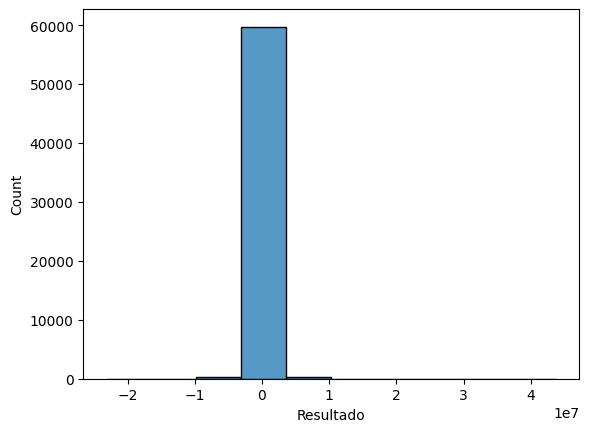

In [24]:
plt.figure()
sns.histplot(df['Resultado'], bins=10)
plt.show()

## Boxplot

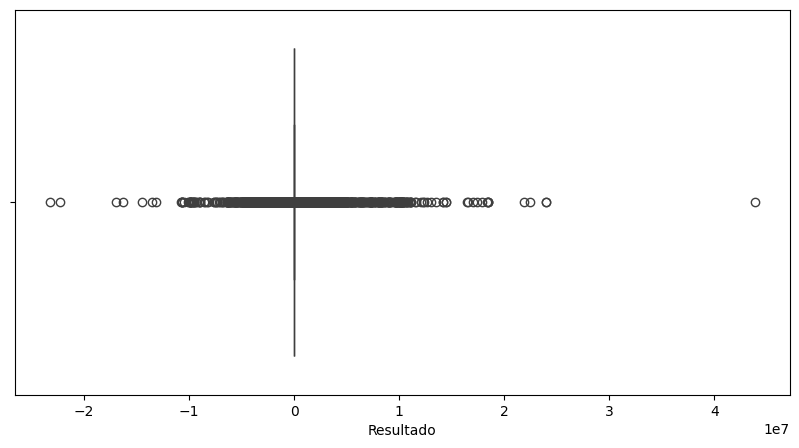

In [25]:
plt.figure(figsize=[10, 5])
sns.boxplot(x=df['Resultado'])
plt.show()

## Columnas categóricas

In [26]:
df.describe(include=['category', 'object']).T

,count,unique,top,freq
Descripción Linea V,60302,11,SERV. AUXILIARES,35368
Descripción Subcuen,57287,37,CARGAS SOCIALES,18120
Concepto,60302,8435,AJUSTE 01/2023 T90 SILTRA,1179
Perfíl,60302,56451,TSOPER1,3127
Responsable,60302,2,Mercedes_Hernandez,51746


In [28]:
columnas_cat = df.select_dtypes(include=['category', 'object']).columns
columnas_cat


Index(['Descripción Linea V', 'Descripción Subcuen', 'Concepto', 'Perfíl',
       'Responsable'],
      dtype='object')

In [29]:
for col in columnas_cat:
    print(f'La columan {col} tiene un total de {df[col].nunique()} valores distintos')
    print("Los 10 valores más repetidos son:")
    display(df[col].value_counts(dropna=False).head(10))

La columan Descripción Linea V tiene un total de 11 valores distintos
Los 10 valores más repetidos son:


Descripción Linea V
SERV. AUXILIARES    35368
SERV. LOGÍSTICOS     6786
SERV. DEPORTIVOS     4276
FACILITY S.AUXIL     3316
SERV. ESCOLARES      3100
SERV.COMERCIALES     2565
BPO                  2509
ARTE Y CULTURA       1590
OCIO/TIEMPO LIBR      665
S.AUX.HOTEL/CRUC      111
Name: count, dtype: int64

La columan Descripción Subcuen tiene un total de 37 valores distintos
Los 10 valores más repetidos son:


Descripción Subcuen
CARGAS SOCIALES             18120
SUELDOS Y SALARIOS           9955
AMORT. INMOV. MATERIAL       5772
SERV. AUX. TERCEROS          4592
PRODUCCION VALORADA SPYC     3637
NaN                          3015
MATERIALES                   2948
COMUNICACIONES               1969
ALQUILERES                   1684
TRABAJOS SUBCONTRATADOS      1593
Name: count, dtype: int64

La columan Concepto tiene un total de 8435 valores distintos
Los 10 valores más repetidos son:


Concepto
AJUSTE 01/2023 T90 SILTRA       1179
AJUSTE 03/2023 T90 SILTRA       1117
AJUSTE 07/2023 T90 SILTRA       1106
AJUSTE 05/2023 T90 SILTRA       1102
AJUSTE 02/2023 T90 SILTRA       1084
AJUSTE 06/2023 T90 SILTRA       1084
AJUSTE 04/2023 T90 SILTRA       1044
AJUSTE 09/2023 T90 SILTRA        938
PERIOD. LICENCIA GOOGLE 2023     900
AJUSTE 11/2023 T90 SILTRA        893
Name: count, dtype: int64

La columan Perfíl tiene un total de 56451 valores distintos
Los 10 valores más repetidos son:


Perfíl
TSOPER1       3127
APICOMP        686
X9795417ZS       2
X4107181ZS       2
X0314501ZS       2
X5239839ZS       2
X0811466ZS       2
X4689948ZS       2
X1369602ZS       2
X0171089ZS       2
Name: count, dtype: int64

La columan Responsable tiene un total de 2 valores distintos
Los 10 valores más repetidos son:


Responsable
Mercedes_Hernandez    51746
Fernando_Trujillo      8556
Name: count, dtype: int64

## Countplot

Distribución de la comuna Descripción Linea V


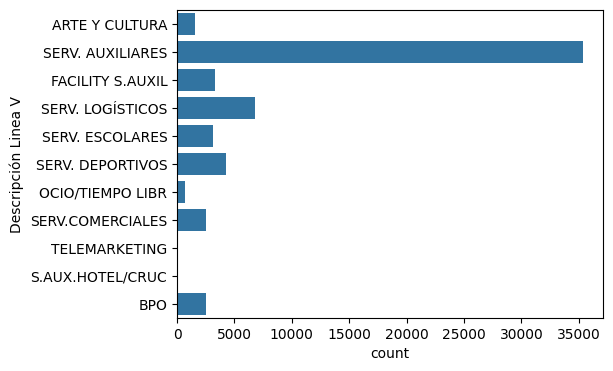

Distribución de la comuna Descripción Subcuen


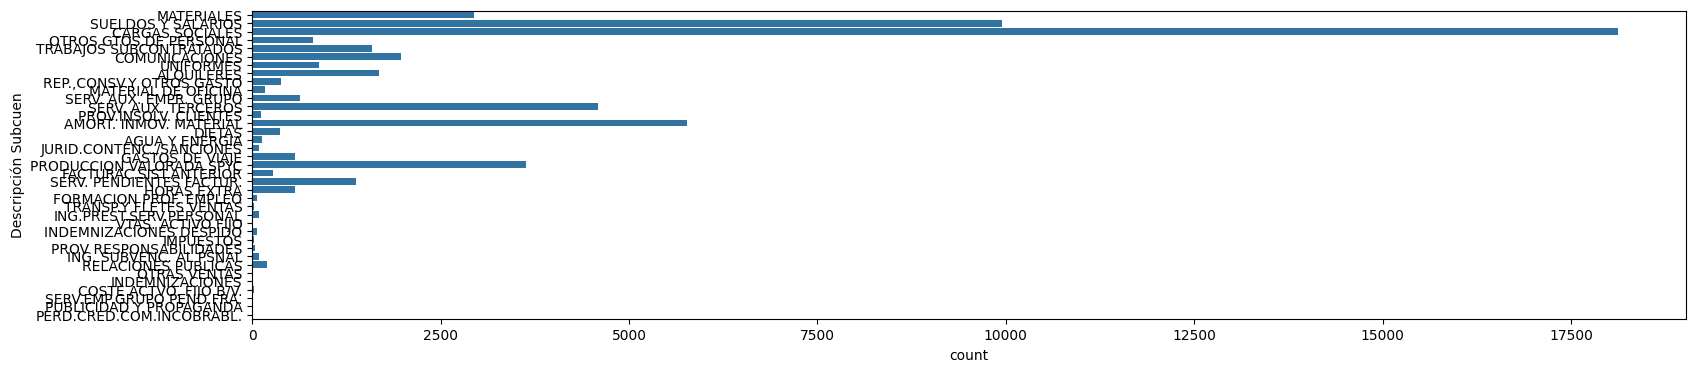

Comuna Concepto tiene demasiadas categorías: 8435
Comuna Perfíl tiene demasiadas categorías: 56451
Distribución de la comuna Responsable


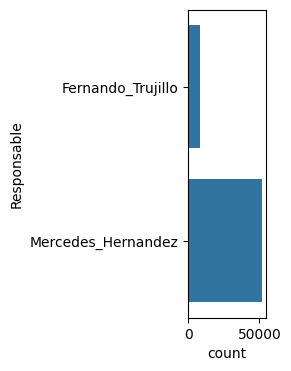

In [35]:
for col in columnas_cat:
    if df[col].nunique() > 40:
        print(f"Comuna {col} tiene demasiadas categorías: {df[col].nunique()}")
        continue
        
    print(f"Distribución de la comuna {col}")   
    
    ancho = df[col].nunique() * 0.5  # escala más razonable
    plt.figure(figsize=(ancho, 4))
    sns.countplot(df[col])
    plt.show()
